In [18]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('white') 
%matplotlib inline 
df2 = pd.read_csv("/home/user/Advertisement_users.csv")
df1 = pd.read_csv("/home/user/Adds.csv") 
result = pd.concat([df2, df1], axis=1) 
a=result.to_csv("/home/user/Addssuggestion.csv")
category= pd.read_csv('/home/user/Adds.csv') 
category1= pd.read_csv('/home/user/Advertisement_users.csv') 
category.head
category1.head
abc = pd.merge(category,category1, on='category') 
abc.head() 


,videoid_ads,category,videoid,userid
0,TcMBFSGVi1c,Film & Animation,cA-O4oS-Wb8,3
1,TcMBFSGVi1c,Film & Animation,3-Xq_Zz3nPA,3
2,TcMBFSGVi1c,Film & Animation,3-Xq_Zz3nPA,5
3,TcMBFSGVi1c,Film & Animation,i7CxJiMnCDc,5
4,TcMBFSGVi1c,Film & Animation,BsF9eOfk2s4,5


In [16]:
abc.groupby('category')['userid'].mean().sort_values(ascending=False).head() 

category
Education           5.000000
Entertainment       4.857143
Film & Animation    4.500000
Comedy              4.500000
Music               3.913043
Name: userid, dtype: float64

In [17]:
abc.groupby('category')['userid'].count().sort_values(ascending=False).head() 

category
Music               529
Howto & Style       225
Entertainment        49
Film & Animation     36
People & Blogs       25
Name: userid, dtype: int64

In [9]:
adds = pd.DataFrame(abc.groupby('category')['userid'].mean())  
adds['num of adds'] = pd.DataFrame(abc.groupby('category')['userid'].count()) 
adds.head()

,userid,num of adds
category,,
Comedy,4.500000,4
Education,5.000000,1
Entertainment,4.857143,49
Film & Animation,4.500000,36
Howto & Style,3.066667,225


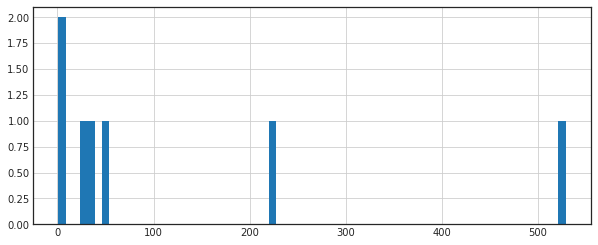

In [11]:
# plot graph of 'num of ads column' 
plt.figure(figsize =(10, 4)) 
adds['num of adds'].hist(bins = 70) 

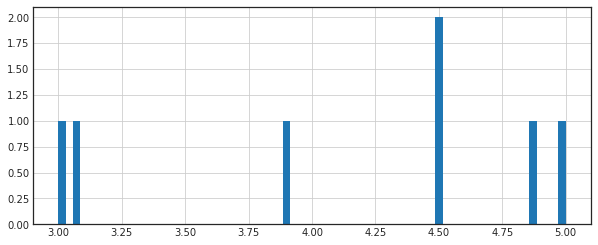

In [12]:
# plot graph of 'users' column 
plt.figure(figsize =(10, 4)) 
adds['userid'].hist(bins = 70) 


In [13]:
ads = abc.pivot_table(index ='category', 
              columns ='videoid_ads', values ='userid')   
ads.head() 
adds.sort_values('num of adds', ascending = False).head(10) 

,userid,num of adds
category,,
Music,3.913043,529
Howto & Style,3.066667,225
Entertainment,4.857143,49
Film & Animation,4.500000,36
People & Blogs,3.000000,25
Comedy,4.500000,4
Education,5.000000,1
